In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Data taken from ETH and BITQ from 12 05 2021 to 04 03 2022
eth_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_ETHUSDT_d.csv')
bitq_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\BITQ.csv')
btc_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_BTCUSDT_d.csv')


#Quick check
#eth_data.head()
#bitq_data.head()
btc_data.head()

,unix,Date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.646440e+12,05 03 2022,BTC/USDT,39148.65,39197.94,38901.58,39081.88,920.96136,3.594036e+07,19906.0
1,1.646350e+12,04 03 2022,BTC/USDT,42454.00,42527.30,38550.00,39148.66,61964.68498,2.527001e+09,1465066.0
2,1.646270e+12,03 03 2022,BTC/USDT,43892.99,44101.12,41832.28,42454.00,50940.61021,2.192152e+09,1289320.0
3,1.646180e+12,02 03 2022,BTC/USDT,44421.20,45400.00,43334.09,43892.98,57782.65081,2.550793e+09,1653131.0
4,1.646090e+12,01 03 2022,BTC/USDT,43160.00,44949.00,42809.98,44421.20,61743.09873,2.701611e+09,1866871.0


In [16]:
#Collecting dates and closing prices from the data
db_eth = eth_data.iloc[:,[1,6]]
db_bitq = bitq_data.iloc[:,[0,5]]
db_btc = btc_data.iloc[:,[1,6]]

#Merging crypto data on the date
ETHxBITQ = pd.merge(db_eth, db_bitq,on='Date', how='inner')
ETHxBITQxBTC = pd.merge(ETHxBITQ, db_btc,on='Date', how='inner')

#Renaming the columns creating new DF
ExB = ETHxBITQxBTC.rename(columns ={'close_x':'ETH','Adj Close':'BITQ','close_y':'BTC'}, inplace= False)

#Setting the index as the date
ExB.set_index('Date',inplace=True, drop=True)
ExB

,ETH,BITQ,BTC
Date,,,
04 03 2022,2622.10,14.779000,39148.66
03 03 2022,2833.99,16.000000,42454.00
02 03 2022,2947.30,17.000000,43892.98
01 03 2022,2976.33,16.770000,44421.20
28 02 2022,2920.95,16.600000,43160.00
...,...,...,...
18 05 2021,3375.07,21.661709,42849.78
17 05 2021,3282.51,21.768702,43538.04
14 05 2021,4075.01,22.683027,49841.45


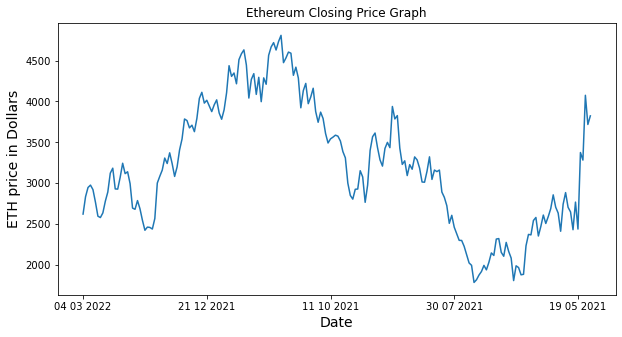

In [17]:
ExB['ETH'].plot(figsize=(10,5))
plt.title('Ethereum Closing Price Graph')
plt.xlabel('Date',fontsize=14)
plt.ylabel('ETH price in Dollars',fontsize=14)
plt.savefig('Ethereum Closing Price Graph.jpeg', bbox_inches='tight')

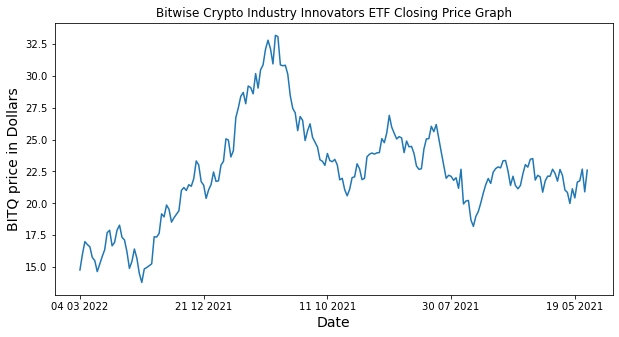

In [18]:
ExB['BITQ'].plot(figsize=(10,5))
plt.title('Bitwise Crypto Industry Innovators ETF Closing Price Graph')
plt.xlabel('Date',fontsize=14)
plt.ylabel('BITQ price in Dollars',fontsize=14)
plt.savefig('Bitwise Crypto Industry Innovators ETF Closing Price Graph.jpeg', bbox_inches='tight')

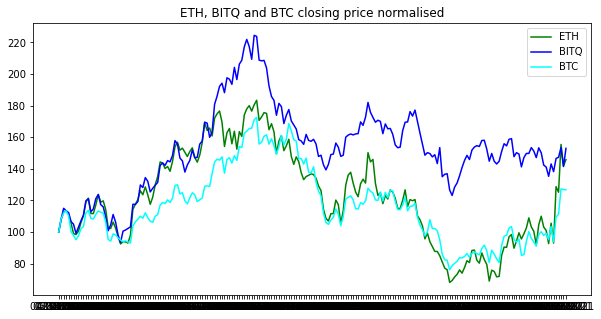

In [19]:
#Normalised data (Normalising the two graphs to see if the closing prices tracked eachother over time)
x1 = ExB['ETH']/ExB['ETH'].iloc[0]*100
x2 = ExB['BITQ']/ExB['BITQ'].iloc[0]*100
x3 = ExB['BTC']/ExB['BTC'].iloc[0]*100

plt.figure(figsize=(10,5))
plt.plot(x1,c='green',label='ETH')
plt.plot(x2,c='blue',label='BITQ')
plt.plot(x3,c='cyan',label='BTC')
plt.title('ETH, BITQ and BTC closing price normalised')
plt.style.use('tableau-colorblind10')
plt.savefig('ETH, BITQ and BTC closing price normalised Graph.jpeg', bbox_inches='tight')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

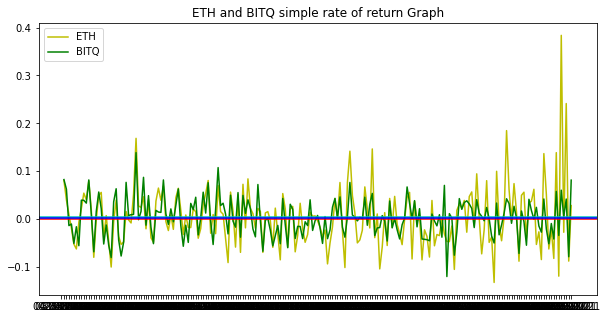

In [20]:
# Simple rate of return
ExB['Simple return ETH'] = (ExB['ETH']/ExB['ETH'].shift(1)) - 1
ExB['Simple return BITQ'] = (ExB['BITQ']/ExB['BITQ'].shift(1)) - 1

plt.figure(figsize=(10,5))
plt.plot(ExB['Simple return ETH'],'-y',label='ETH')
plt.plot(ExB['Simple return BITQ'],'-g',label='BITQ')
plt.title('ETH and BITQ simple rate of return Graph')

#Plot the zero line
plt.axhline(y=0, color='r', linestyle='-')

#Plot the averages
plt.axhline(y=ExB['Simple return ETH'].mean(), color='c', linestyle='-')
plt.axhline(y=ExB['Simple return BITQ'].mean(), color='b', linestyle='-')

plt.savefig('BITQ and ETH simple returns graph.jpeg', bbox_inches='tight')

plt.legend()
plt.show

In [21]:
#The average daily rate of return in a percentage
print('ETH average daily returns = ' + str(round(ExB['Simple return ETH'].mean(),5)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('ETH average return for period = ' + str(round(ExB['Simple return ETH'].mean()*205,5)*100) + '%' + '\n')

#The average daily rate of return in a percentage
print('BITQ average daily returns = ' + str(round(ExB['Simple return BITQ'].mean(),5)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('BITQ average return for period = ' + str(round(ExB['Simple return BITQ'].mean()*205,5)*100) + '%')

ETH average daily returns = 0.371%
ETH average return for period = 76.092%

BITQ average daily returns = 0.28800000000000003%
BITQ average return for period = 59.031%


<function matplotlib.pyplot.show(close=None, block=None)>

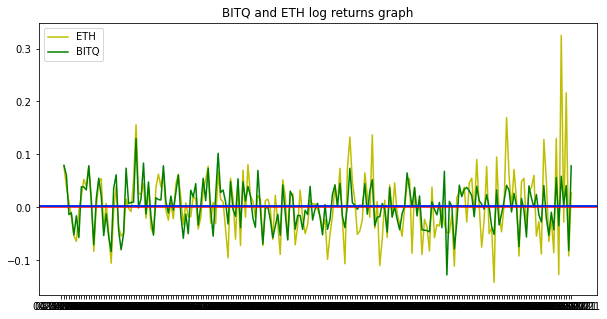

In [22]:
# Logarithmetic rate of return
ExB['Simple log return ETH'] = np.log(ExB['ETH']/ExB['ETH'].shift(1))
ExB['Simple log return BITQ'] = np.log(ExB['BITQ']/ExB['BITQ'].shift(1))

plt.figure(figsize=(10,5))
plt.plot(ExB['Simple log return ETH'],'-y',label='ETH')
plt.plot(ExB['Simple log return BITQ'],'-g',label='BITQ')
plt.title('BITQ and ETH log returns graph')

#Plot the zero line
plt.axhline(y=0, color='r', linestyle='-')

#Plot the averages
plt.axhline(y=ExB['Simple log return ETH'].mean(), color='c', linestyle='-')
plt.axhline(y=ExB['Simple log return BITQ'].mean(), color='b', linestyle='-')

plt.savefig('BITQ and ETH log returns graph.jpeg', bbox_inches='tight')

plt.legend()
plt.show

In [23]:
#The average daily rate of return in a percentage
print('ETH average daily log returns = ' + str(round(ExB['Simple log return ETH'].mean(),4)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('ETH average log returns for period = ' + str(round(ExB['Simple log return ETH'].mean()*205,5)*100) + '%' + '\n')

#The average daily rate of return in a percentage
print('BITQ average daily log returns = ' + str(round(ExB['Simple log return BITQ'].mean(),5)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('BITQ average log returns for period = ' + str(round(ExB['Simple log return BITQ'].mean()*205,5)*100) + '%')

ETH average daily log returns = 0.18%
ETH average log returns for period = 37.711%

BITQ average daily log returns = 0.207%
BITQ average log returns for period = 42.497%


In [24]:
#To look for the covariance
ExB = ExB.drop(['BTC','Simple return ETH','Simple return BITQ','Simple log return ETH','Simple log return BITQ'],axis=1)

log_returns = np.log(ExB/ExB.shift(1))

In [25]:
#Calculating the variance in ETH
ETH_variance = ExB['ETH'].var()
ETH_variance

583343.8814322426

In [26]:
#Calculating the standard deviation
log_returns['ETH'].std()

0.06059211785407074

In [27]:
#Calculating the standard deviation
log_returns['BITQ'].std()

0.04015029124324896

In [28]:
# Calculating the daily variance and covariance
cov = ExB.cov()
cov

,ETH,BITQ
ETH,583343.881432,1982.120465
BITQ,1982.120465,16.231251


In [29]:
# Calculating the annualised variance and covariance
cov = ExB.cov() *205
cov

,ETH,BITQ
ETH,1.195855e+08,406334.695347
BITQ,4.063347e+05,3327.406406


In [30]:
#Calculating corralation
ExB.corr()

,ETH,BITQ
ETH,1.000000,0.644157
BITQ,0.644157,1.000000


In [31]:
# Calculating the securities Beta
# The riskier the stock the higher the Beta
cov_with_market = cov.iloc[0,1]

eth_market_var = ExB['ETH'].var()

ETH_beta = cov_with_market / eth_market_var
ETH_beta



0.6965611679156365